In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Part 1: Implementing Kmeans

In [4]:
class KMeans:
    def __init__(self, n_clusters=3, max_iterations=100, random_state=None):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters: Number of clusters (default is 3).
        - max_iterations: Maximum number of iterations (default is 100).
        - random_state: Seed for random number generation (default is None).
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def fit(self, data):
        """
        Fit the KMeans algorithm to the input data.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space. 
        """
        # Implementation of KMeans algorithm
        np.random.seed(self.random_state)
        self.centroids = data[np.random.choice(len(data), self.n_clusters,
                                               replace=False)]

        for n in range(self.max_iterations):
            # Assign labels based on nearest centroid using euclidean
            dist = data[:, np.newaxis] - self.centroids
            eucl_dist = np.linalg.norm(dist, axis=2)
            self.labels = np.argmin(eucl_dist, axis=1)

            # Update centroids using mean of points in a cluster
            new_centroids = np.array([data[self.labels == i].mean(axis=0)
                                      for i in range(self.n_clusters)])

            # Convergence check
            if np.allclose(self.centroids, new_centroids):
                # Uncomment for testing
                # print(f'Convergence achieved at {n}th iteration')
                break

            self.centroids = new_centroids

        # Uncomment for testing
        # print('Convergence not reached')

    def predict(self, data):
        """
        Assign data points to the nearest cluster based on current centroids.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.

        Returns:
        - labels: Array of cluster labels assigned to each data point.
        """
        # Assign labels
        return np.argmin(np.linalg.norm(data[:, np.newaxis] - self.centroids,
                                        axis=2), axis=1)

    def get_centroids(self):
        """
        Get the current centroids after fitting the algorithm.

        Returns:
        - centroids: Numpy array representing the centroids of clusters.
        """
        return self.centroids


# Unit Testing, ensuring code runs properly

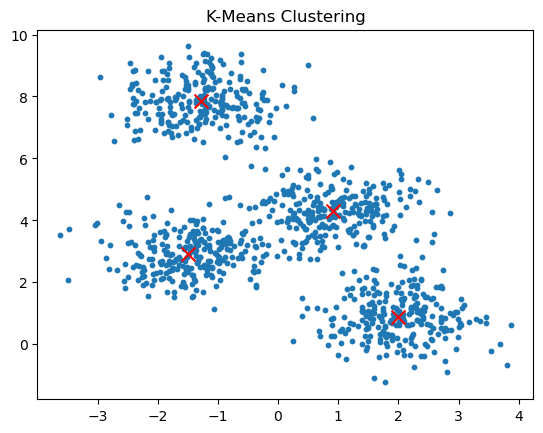

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=.7, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# plot the data and cluster centers
plt.scatter(x=X[:, 0], y=X[:, 1], s=10)
plt.scatter(x=kmeans.get_centroids()[:, 0], y=kmeans.get_centroids()[:, 1], marker='x', s=100, c='r')
plt.title('K-Means Clustering')
plt.show()

In [7]:
import unittest

# Define unit tests
class TestKMeans(unittest.TestCase):
    def setUp(self):
        '''Generate data and run it through the Kmeans algorithm'''
        self.data = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8],
                              [1, 0.6], [9, 11]])
        self.kmeans = KMeans(n_clusters=2, max_iterations=100, random_state=10)

    def test_fit(self):
        '''
        Ensure the fit function runs properly
        Asserts that centroids and labels aren't null
        Asserts the correct number of centroids
        Asserts the correct number of labels
        '''
        self.kmeans.fit(self.data)
        self.assertIsNotNone(self.kmeans.centroids)
        self.assertIsNotNone(self.kmeans.labels)
        self.assertEqual(len(self.kmeans.centroids), 2)
        self.assertEqual(len(self.kmeans.labels), len(self.data))

    def test_predict(self):
        '''
        Ensure the predict function runs properly
        Asserts that all points are labeled
        Asserts that all labels are assigned to a cluster
        '''
        self.kmeans.fit(self.data)
        predicted_labels = self.kmeans.predict(self.data)
        self.assertEqual(len(predicted_labels), len(self.data))
        self.assertTrue(np.all(np.isin(predicted_labels, [0, 1])))

    def test_get_centroids(self):
        '''
        Ensure the gen centroids function runs properly
        Asserts that centroids does not return None
        Asserts the correct number of centroids
        Asserts that the centroid has the proper number of attributes
        '''
        self.kmeans.fit(self.data)
        centroids = self.kmeans.get_centroids()
        self.assertIsNotNone(centroids)
        self.assertEqual(len(centroids), 2)
        self.assertEqual(len(centroids[0]), len(self.data[0]))


# Run the tests
suite = unittest.TestLoader().loadTestsFromTestCase(TestKMeans)
unittest.TextTestRunner().run(suite)

print('Looks like everything passed')

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

# Part 2: Exploring Time Complexity

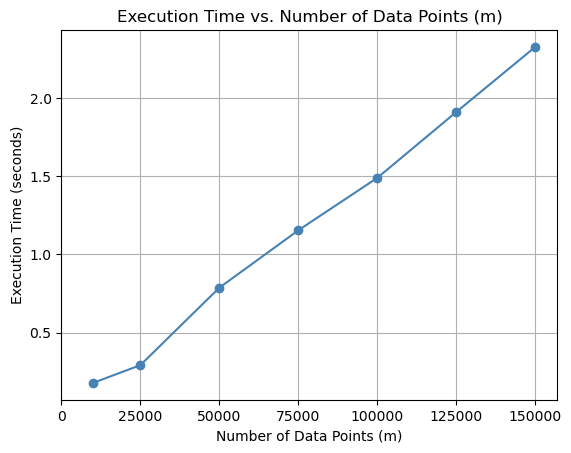

In [192]:
# Initialize parameters
n = 10
K = 5
iters = 50
M = [10000, 25000, 50000, 75000, 100000, 125000, 150000]
execution_times = []

for m in M:
    # Generate random data points
    data = np.random.rand(m, n)
    
    # Run K-Means algorithm and record execution time
    start_time = time.time()
    kmeans = KMeans(n_clusters=K, max_iterations=iters)
    kmeans.fit(data)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plot execution times vs. values of m
plt.plot(M, execution_times, marker='o', color='steelblue')
plt.title('Execution Time vs. Number of Data Points (m)')
plt.xlabel('Number of Data Points (m)')
plt.xticks(np.arange(0, 160000, 25000))

plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

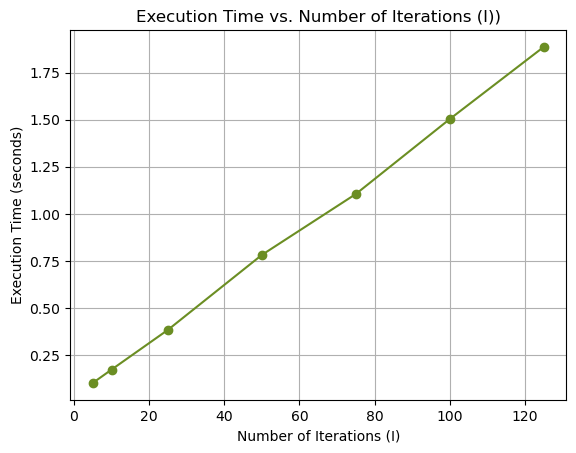

In [181]:
# Initialize parameters
n = 10
K = 5
# Higher iterations will result in convergence being reached early
iters = [5, 10, 25, 50, 75, 100, 125]
M = 50000
execution_times = []

for i in iters:
    # Generate random data points
    data = np.random.rand(M, n)

    # Run K-Means algorithm and record execution time
    start_time = time.time()
    kmeans = KMeans(n_clusters=K, max_iterations=i)
    kmeans.fit(data)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plot execution times vs. values of m
plt.plot(I, execution_times, marker='o', color='olivedrab')
plt.title('Execution Time vs. Number of Iterations (I))')
plt.xlabel('Number of Iterations (I)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

### Note
As the number of iterations increase it is more likely that convergence is reached before the total number of iterations is completed which will terminate the linear relationship.

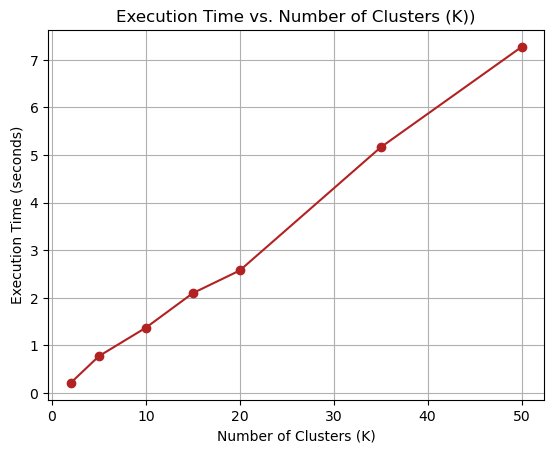

In [182]:
# Initialize parameters
n = 10
K = [2, 5, 10, 15, 20, 35, 50]
iters = 50
M = 50000
execution_times = []

for k in K:
    # Generate random data points
    data = np.random.rand(M, n)

    # Run K-Means algorithm and record execution time
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, max_iterations=iters)
    kmeans.fit(data)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plot execution times vs. values of m
plt.plot(K, execution_times, marker='o', color='firebrick')
plt.title('Execution Time vs. Number of Clusters (K))')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

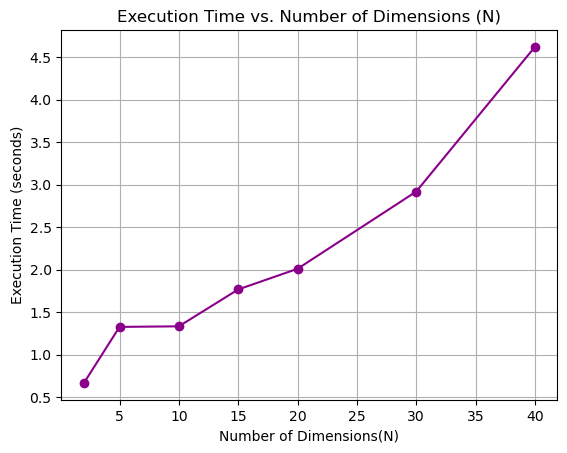

In [183]:
# Initialize parameters
N = [2, 5, 10, 15, 20, 30, 40]
K = 10
iters = 50
M = 50000
execution_times = []

for n in N:
    # Generate random data points
    data = np.random.rand(M, n)

    # Run K-Means algorithm and record execution time
    start_time = time.time()
    kmeans = KMeans(n_clusters=K, max_iterations=iters)
    kmeans.fit(data)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plot execution times vs. values of m
plt.plot(N, execution_times, marker='o', color='darkmagenta')
plt.title('Execution Time vs. Number of Dimensions (N)')
plt.xlabel('Number of Dimensions(N)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

# Discussion

The time complexity for the fit method will dominate the execution time, in the form of O(I•m•n•K). This is because for each iteration we calculate the euclidean between m points with n attributes for K clusters. This time complexity is reaffirmed by our graphs. As we change each parameter while keeping other parameters constant we see O(n) time complexity where n is the variable representing the parameter being varied. This means that as we double the value of our parameter, for example, if the number of clusters goes from 10 to 20, then the time it takes for our algorithm to run will about double as well. 

# Part 3: Image Compression

In [5]:
from PIL import Image

# Get image
image = Image.open('img.JPG')
img_arr = np.array(image)

# Get pixels
m, n, _ = img_arr.shape
pixels = img_arr.reshape(m * n, -1)

kmeans = KMeans(n_clusters=5)  # Clusters = # of colors in our image
kmeans.fit(pixels)

In [185]:
# Replace each pixel with value of its centroid
compressed_data = kmeans.centroids[kmeans.labels]
# Reshape the compressed back to original dim
compressed_image_array = compressed_data.reshape(m, n, -1).astype(np.uint8)

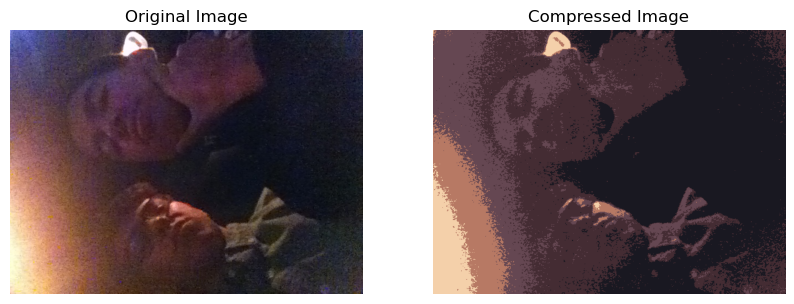

In [186]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image_array)
plt.title('Compressed Image')
plt.axis('off')

plt.show()

# Discussion

Compression reduces the number of colors an images contains. When using Kmeans clustering on a photo you are esssentially compressing the photo by assigning pixels to their corresponding cluster. This reduces the number of colors an image contains to the number of clusters chosen. We can see this visual impact in the photo as colors are seperated more distinctly, forming harsher lines in the image. In all, compression will save memory but the quality of the photo may be compromised if too few clusters are chosen which will result in some colors not being adequately displayed. For example, in this case you can see that my friend's green shirt is assigned to a more purple cluster.

# Part 4: Additional Tasks for Exploration

In [187]:
class KMeans:
    def __init__(self, n_clusters=3, max_iterations=100, random_state=None):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters: Number of clusters (default is 3).
        - max_iterations: Maximum number of iterations (default is 100).
        - random_state: Seed for random number generation (default is None).
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def fit(self, data, distance='euclidean'):
        """
        Fit the KMeans algorithm to the input data.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.
        """
        # Implementation of KMeans algorithm
        np.random.seed(self.random_state)
        self.centroids = data[np.random.choice(len(data), self.n_clusters,
                                               replace=False)]

        for n in range(self.max_iterations):
            # Assign labels based on nearest centroid with distance metric
            if distance == 'euclidean':
                dist = data[:, np.newaxis] - self.centroids
                distances = np.linalg.norm(dist, axis=2)
            elif distance == 'manhattan':
                dist = np.abs(data[:, np.newaxis] - self.centroids)
                distances = np.sum(dist, axis=2)
            else:
                raise ValueError("Invalid distance metric.")

            self.labels = np.argmin(distances, axis=1)

            # Update centroids using mean of points in a cluster
            new_centroids = np.array([data[self.labels == i].mean(axis=0)
                                      for i in range(self.n_clusters)])

            # Convergence check
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, data):
        """
        Assign data points to the nearest cluster based on current centroids.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.

        Returns:
        - labels: Array of cluster labels assigned to each data point.
        """
        # Assign labels
        return np.argmin(np.linalg.norm(data[:, np.newaxis] - self.centroids,
                                        axis=2), axis=1)

    def get_centroids(self):
        """
        Get the current centroids after fitting the algorithm.

        Returns:
        - centroids: Numpy array representing the centroids of clusters.
        """
        return self.centroids


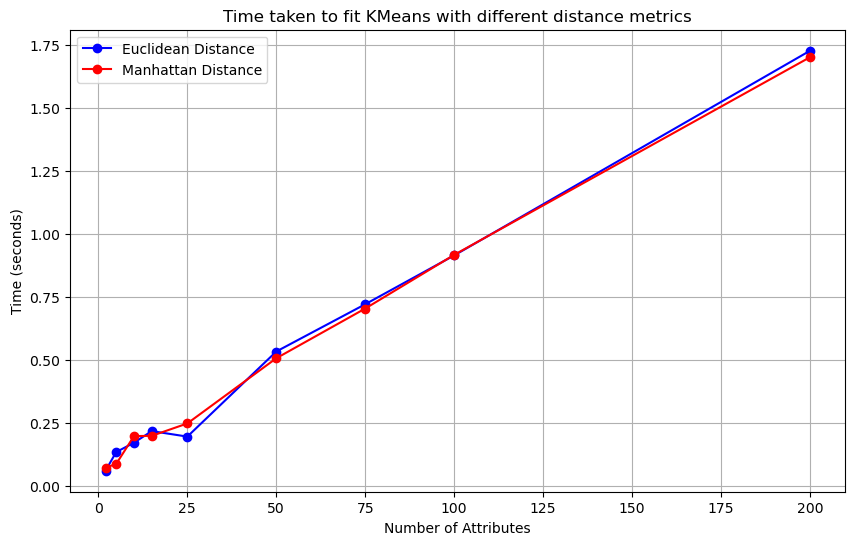

In [188]:
# Initialize parameters
n_dim = [2, 5, 10, 15, 25, 50, 75, 100, 200]
euclidean_times = []
manhattan_times = []

for n in n_dim:
    # Generate random data
    data = np.random.rand(10000, n)  # Sample data

    # Create KMeans instance
    kmeans = KMeans(n_clusters=5, max_iterations=50, random_state=5)

    # Fit the algorithm with Euclidean distance
    start_time = time.time()
    kmeans.fit(data, distance='euclidean')
    end_time = time.time()
    euclidean_time = end_time - start_time
    euclidean_times.append(euclidean_time)

    # Fit the algorithm with Manhattan distance
    start_time = time.time()
    kmeans.fit(data, distance='manhattan')
    end_time = time.time()
    manhattan_time = end_time - start_time
    manhattan_times.append(manhattan_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_dim, euclidean_times, label='Euclidean Distance', color='blue',
         marker='o')
plt.plot(n_dim, manhattan_times, label='Manhattan Distance', color='red',
         marker='o')
plt.title('Time taken to fit KMeans with different distance metrics')
plt.xlabel('Number of Attributes')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()



# Discussion 

It appears as though changing the distance calculation from euclidean to manhattan does not affect the algorithm performance. We can see this on the graph since as I increment different parameters the time it takes to complete the algorithm remains equal between the euclidean or the manhattan distance calculation.

In [189]:
class KMeans:
    def __init__(self, n_clusters=3, max_iterations=100, random_state=None, initialization='random'):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters: Number of clusters (default is 3).
        - max_iterations: Maximum number of iterations (default is 100).
        - random_state: Seed for random number generation (default is None).
        - initialization: Centroid initialization strategy ('random' or 'kmeans++') (default is 'random').
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.initialization = initialization
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, data):
        if self.initialization == 'random':
            np.random.seed(self.random_state)
            self.centroids = data[np.random.choice(len(data), self.n_clusters,
                                                   replace=False)]
        elif self.initialization == 'kmeans++':
            # K-Means++ initialization
            np.random.seed(self.random_state)
            # Choose the first centroid randomly
            self.centroids = [data[np.random.randint(len(data))]]

            for _ in range(1, self.n_clusters):
                distances = np.array([min([np.linalg.norm(x-c)**2 for c in self.centroids])for x in data])
                probs = distances / distances.sum()
                cumprobs = probs.cumsum()
                r = np.random.rand()
                for j, p in enumerate(cumprobs):
                    if r < p:
                        i = j
                        break
                self.centroids.append(data[i])

            self.centroids = np.array(self.centroids)

    def fit(self, data):
        """
        Fit the KMeans algorithm to the input data.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.
        """
        # Initialize centroids
        self._initialize_centroids(data)

        for n in range(self.max_iterations):
            # Assign labels based on nearest centroid using euclidean
            dist = data[:, np.newaxis] - self.centroids
            eucl_dist = np.linalg.norm(dist, axis=2)
            self.labels = np.argmin(eucl_dist, axis=1)

            # Update centroids using mean of points in a cluster
            new_centroids = np.array([data[self.labels == i].mean(axis=0)
                                      for i in range(self.n_clusters)])

            # Convergence check
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids


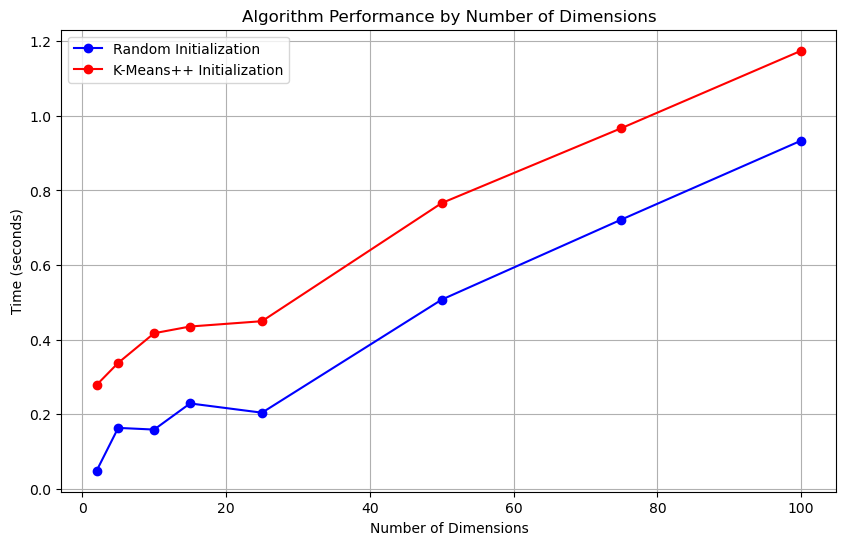

In [190]:
n_dim = [2, 5, 10, 15, 25, 50, 75, 100]
random_times = []
kmeans_times = []

for dim in n_dim:
    # Generate random data with the specified number of dimensions
    data = np.random.rand(10000, dim)  # Sample data

    # Create KMeans instance with random initialization
    kmeans_random = KMeans(n_clusters=5, max_iterations=50, random_state=5, initialization='random')
    start_time = time.time()
    kmeans_random.fit(data)
    end_time = time.time()
    random_times.append(end_time - start_time)

    # Create KMeans instance with k-means++ initialization
    kmeans_kmeans = KMeans(n_clusters=5, max_iterations=50, random_state=5, initialization='kmeans++')
    start_time = time.time()
    kmeans_kmeans.fit(data)
    end_time = time.time()
    kmeans_times.append(end_time - start_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_dim, random_times, label='Random Initialization', color='blue', marker='o')
plt.plot(n_dim, kmeans_times, label='K-Means++ Initialization', color='red', marker='o')
plt.title('Algorithm Performance by Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Discussion
It appears as if K-means++ takes longer to initalize the centroids. However, this difference in initialization is constant. This means that no matter how I change the parameters, the difference between the time it takes to initialize the centroids, either randomly or using the kmeans++ algorithm, doesn't change. Therefore the effect on algorithm perforamnce is negligible and does not scale with the increase of other parameters. You pay the time cost of the initialization up front.